<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Variational A.Encoder & A.Encoder || Generative-AI🔥</div>
</div>

![](https://media.geeksforgeeks.org/wp-content/uploads/20200710000625/variational.jpg)

Variational Autoencoders (VAEs) are a type of generative model that extends traditional autoencoders by adding a probabilistic spin to their latent space representation. Unlike traditional autoencoders that map input data to a fixed, deterministic latent space, VAEs map data to a distribution in the latent space, typically a Gaussian distribution. This allows VAEs to generate new data points by sampling from this learned distribution, enabling them to generate novel outputs.

Key concepts in VAEs include:
1. **Encoder Network**: Maps input data to the parameters (mean and variance) of the latent distribution.
2. **Latent Space**: Represents data in a lower-dimensional space where each point corresponds to a distribution rather than a single point.
3. **Reparameterization Trick**: Enables efficient backpropagation through the sampling process by decoupling the stochastic part (sampling from the learned distribution) from the deterministic part (parameter calculations).
4. **Decoder Network**: Reconstructs data from samples drawn from the latent space distribution.

VAEs are trained by optimizing a loss function that balances two objectives:
- **Reconstruction Loss**: Measures how accurately the VAE can reconstruct the input data.
- **KL Divergence Loss**: Ensures that the learned latent space distributions match a prior distribution (usually a unit Gaussian), promoting regularization and improving sample generation.

Applications of VAEs include image generation, data compression, and representation learning in unsupervised settings. They are particularly useful for tasks where generating new data based on learned representations is required.

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📚 Importing Libraries 📚</div>
</div>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from skimage.metrics import structural_similarity as ssim

2024-06-28 08:23:14.917071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 08:23:14.917256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 08:23:15.117597: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🧾 Loading The Dataset 🧾</div>
</div>

In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠 Normalization 🛠</div>
</div>

In [3]:
#Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
#Flatten the images
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 AutoEncoder Model 🔥</div>
</div>

In [5]:
#Autoencoder Model
input_img = keras.Input(shape = (784,))
encoded = layers.Dense(128,activation='relu')(input_img)
encoded = layers.Dense(64, activation = 'relu')(encoded)
encoded = layers.Dense(32, activation = 'relu')(encoded)

#Decoder Model
decoded = layers.Dense(64,activation = 'relu')(encoded)
decoded = layers.Dense(128,activation = 'relu')(decoded)
decoded = layers.Dense(784, activation = 'sigmoid')(decoded)

autoencoder = keras.Model(input_img,decoded)

<div class="text_cell_render border-box-sizing rendered_html">
<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Summary ✔
  </div>
</div>
</div>

In [6]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
autoencoder.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

<div class="text_cell_render border-box-sizing rendered_html">
<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Training ✔
  </div>
</div>
</div>

In [8]:
autoencoder.fit(x_train,x_train, epochs = 50, batch_size = 128, validation_data = (x_test,x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0090 - loss: 0.2839 - val_accuracy: 0.0096 - val_loss: 0.1430
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0134 - loss: 0.1384 - val_accuracy: 0.0110 - val_loss: 0.1239
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0109 - loss: 0.1228 - val_accuracy: 0.0089 - val_loss: 0.1145
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0119 - loss: 0.1142 - val_accuracy: 0.0103 - val_loss: 0.1088
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0118 - loss: 0.1090 - val_accuracy: 0.0106 - val_loss: 0.1043
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0115 - loss: 0.1048 - val_accuracy: 0.0115 - val_loss: 0.1011
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0114 - loss: 0.1019 - val_accuracy: 0.0114 - val_loss: 0.0988
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0124 - loss: 0.0993 - val_accuracy: 0.

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Variational AutoEncoder Model 🔥</div>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Sampling ✔
  </div>
</div>
</div>

In [9]:
class Sampling(layers.Layer):
    def call(self, input):
        z_mean, z_log_var = input
        epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

<div class="text_cell_render border-box-sizing rendered_html">
<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Encoder Model ✔
  </div>
</div>
</div>

In [10]:
#Dimensionality of latent space 
latent_dim = 2

# Encoder model
inputs = keras.Input(shape=(784,))
h = layers.Dense(256, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)
z = Sampling()([z_mean, z_log_var])

In [11]:
encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

In [12]:
#z = layers.Lambda(sampling)([z_mean, z_log_var])

<div class="text_cell_render border-box-sizing rendered_html">
<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Decoder Model ✔
  </div>
</div>
</div>

In [13]:
# Decoder model
decoder_input = keras.Input(shape=(latent_dim,))
h_decoded = layers.Dense(256, activation='relu')(decoder_input)
x_decoded_mean = layers.Dense(784, activation='sigmoid')(h_decoded)
decoder = keras.Model(decoder_input, x_decoded_mean, name="decoder")

In [14]:
# VAE model
outputs = decoder(z)
vae = keras.Model(inputs, outputs, name="vae")

<div class="text_cell_render border-box-sizing rendered_html">
<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Summary ✔
  </div>
</div>
</div>

In [15]:
vae.summary()

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │    200,960 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 2)         │        514 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 2)         │        514 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ dense_7[0][0],    │
│                     │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 784)       │    202,256 │ sampling[0][0]    │
│ (Functional)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 404,244 (1.54 MB)

 Trainable params: 404,244 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
"""xent_loss = tf.keras.losses.binary_crossentropy(input, x_decoded_mean)
kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
vae_loss = tf.reduce_mean(xent_loss + kl_loss)"""

'xent_loss = tf.keras.losses.binary_crossentropy(input, x_decoded_mean)\nkl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))\nvae_loss = tf.reduce_mean(xent_loss + kl_loss)'

In [17]:
# Custom training loop
optimizer = tf.keras.optimizers.Adam()
batch_size = 128
epochs = 60

In [18]:
# Custom loss function
def compute_loss(x, z_mean, z_log_var, x_decoded_mean):
    xent_loss = tf.reduce_sum(keras.losses.binary_crossentropy(x, x_decoded_mean), axis=-1)
    kl_loss = -0.5 * tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
    return tf.reduce_mean(xent_loss + kl_loss)

<div class="text_cell_render border-box-sizing rendered_html">
<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Training ✔
  </div>
</div>
</div>

In [19]:
@tf.function
def train_step(x_batch_train):
    with tf.GradientTape() as tape:
        # Forward pass through encoder
        z_mean, z_log_var, z = encoder(x_batch_train)
        
        # Forward pass through decoder
        x_decoded_mean = decoder(z)
        
        # Compute losses
        loss = compute_loss(x_batch_train, z_mean, z_log_var, x_decoded_mean)
    
    # Compute gradients and apply them
    grads = tape.gradient(loss, vae.trainable_weights)
    optimizer.apply_gradients(zip(grads, vae.trainable_weights))
    return loss

for epoch in range(epochs):
    print(f'Start of epoch {epoch}')
    for step in range(len(x_train) // batch_size):
        x_batch_train = x_train[step * batch_size: (step + 1) * batch_size]
        loss = train_step(x_batch_train)
    
    print(f'Loss at epoch {epoch}: {loss.numpy()}')

Start of epoch 0
Loss at epoch 0: 31.28078842163086
Start of epoch 1
Loss at epoch 1: 30.475994110107422
Start of epoch 2
Loss at epoch 2: 30.04277992248535
Start of epoch 3
Loss at epoch 3: 29.687068939208984
Start of epoch 4
Loss at epoch 4: 29.305763244628906
Start of epoch 5
Loss at epoch 5: 29.52362632751465
Start of epoch 6
Loss at epoch 6: 29.27245330810547
Start of epoch 7
Loss at epoch 7: 29.002511978149414
Start of epoch 8
Loss at epoch 8: 29.04371452331543
Start of epoch 9
Loss at epoch 9: 28.646480560302734
Start of epoch 10
Loss at epoch 10: 28.61608123779297
Start of epoch 11
Loss at epoch 11: 28.600669860839844
Start of epoch 12
Loss at epoch 12: 28.606201171875
Start of epoch 13
Loss at epoch 13: 28.580341339111328
Start of epoch 14
Loss at epoch 14: 28.396438598632812
Start of epoch 15
Loss at epoch 15: 28.192161560058594
Start of epoch 16
Loss at epoch 16: 28.39455795288086
Start of epoch 17
Loss at epoch 17: 28.124526977539062
Start of epoch 18
Loss at epoch 18: 28.3

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✔ Models Evaluation (SSIM) ✔</div>
</div>

In [20]:
def evaluate_autoencoder_ssim_plot(model, x_test):
    decoded_imgs = model.predict(x_test)
    ssim_scores = []
    for i in range(len(x_test)):
        ssim_score = ssim(x_test[i].reshape(28, 28), decoded_imgs[i].reshape(28, 28), data_range=1)
        ssim_scores.append(ssim_score)
    return ssim_scores

In [21]:
ssim_scores_autoencoder = evaluate_autoencoder_ssim_plot(autoencoder, x_test)
ssim_scores_variational_autoencoder = evaluate_autoencoder_ssim_plot(vae, x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [22]:
# Evaluate the Autoencoder using SSIM
def evaluate_autoencoder_ssim(model, x_test):
    decoded_imgs = model.predict(x_test)
    ssim_sum = 0.0
    for i in range(len(x_test)):
        ssim_sum += ssim(x_test[i].reshape(28, 28), decoded_imgs[i].reshape(28, 28), data_range=1)
    return ssim_sum / len(x_test)

autoencoder_ssim = evaluate_autoencoder_ssim(autoencoder, x_test)
print(f"Autoencoder Structural Similarity Index (SSIM): {autoencoder_ssim}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Autoencoder Structural Similarity Index (SSIM): 0.9258599257849837


In [23]:
def evaluate_vae_ssim(model, x_test):
    decoded_imgs = model.predict(x_test)
    ssim_sum = 0.0
    for i in range(len(x_test)):
        ssim_sum += ssim(x_test[i].reshape(28, 28), decoded_imgs[i].reshape(28, 28), data_range=1)
    return ssim_sum / len(x_test)

vae_ssim = evaluate_vae_ssim(vae, x_test)
print(f"VAE Structural Similarity Index (SSIM): {vae_ssim}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
VAE Structural Similarity Index (SSIM): 0.47481181239914566


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📉 (SSIM) Visualization 📊</div>
</div>

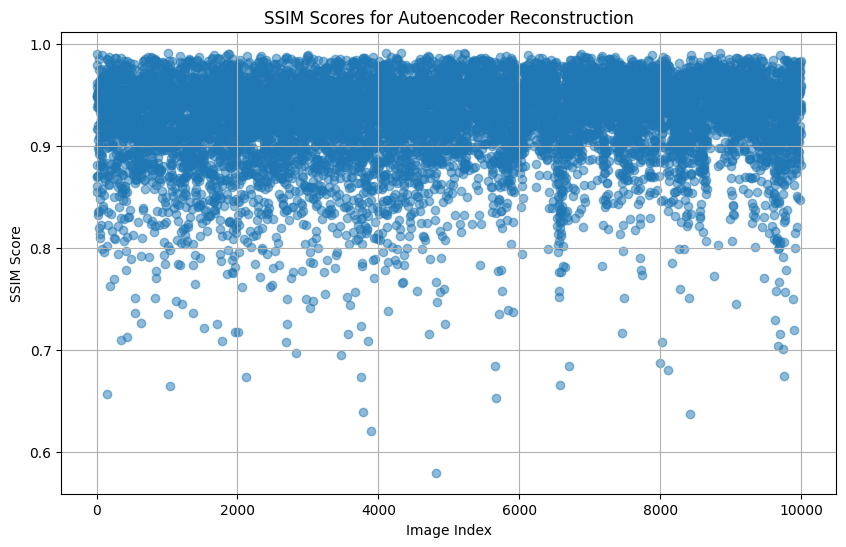

In [24]:
# Plotting SSIM scores
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(ssim_scores_autoencoder)), ssim_scores_autoencoder, marker='o', alpha=0.5)
plt.title('SSIM Scores for Autoencoder Reconstruction')
plt.xlabel('Image Index')
plt.ylabel('SSIM Score')
plt.grid(True)
plt.show()

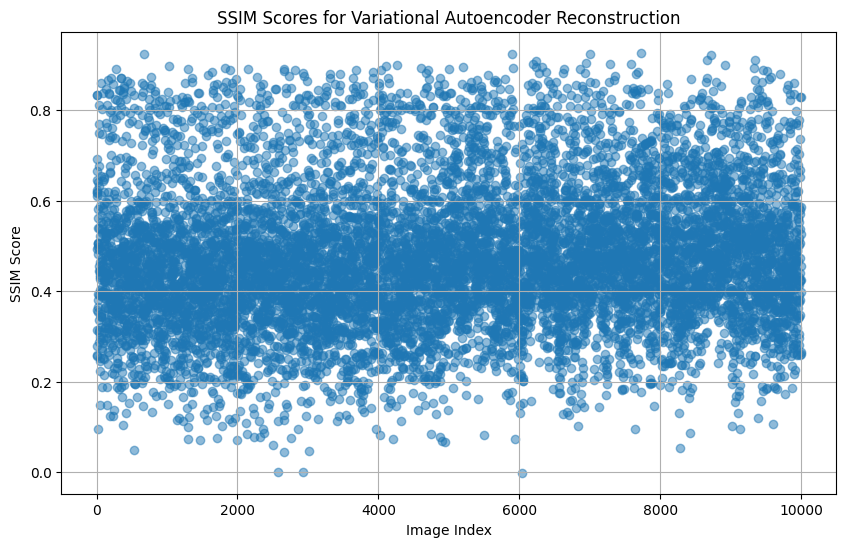

In [25]:
# Plotting SSIM scores
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(ssim_scores_variational_autoencoder)), ssim_scores_variational_autoencoder, marker='o', alpha=0.5)
plt.title('SSIM Scores for Variational Autoencoder Reconstruction')
plt.xlabel('Image Index')
plt.ylabel('SSIM Score')
plt.grid(True)
plt.show()

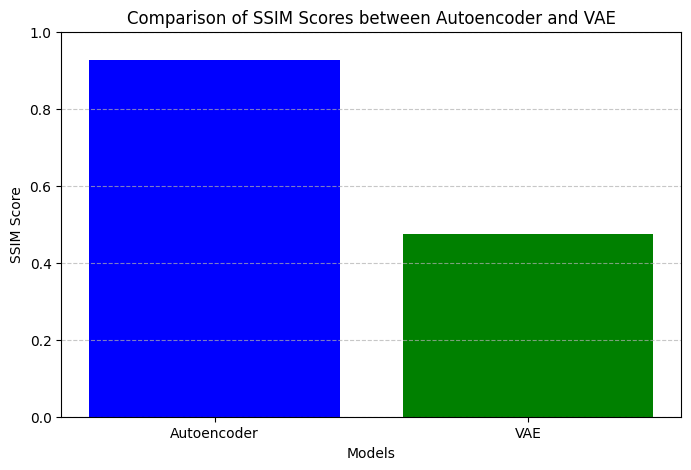

In [26]:
models = ['Autoencoder', 'VAE']
ssim_scores = [autoencoder_ssim, vae_ssim]

plt.figure(figsize=(8, 5))
plt.bar(models, ssim_scores, color=['blue', 'green'])  # Adjust colors as needed
plt.xlabel('Models')
plt.ylabel('SSIM Score')
plt.title('Comparison of SSIM Scores between Autoencoder and VAE')
plt.ylim(0, 1)  # Adjust ylim to ensure SSIM score range is visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Let's break down how the `evaluate_autoencoder_ssim` function works step by step:

### Breakdown of the Function:

1. **Predict Reconstructed Images**: `decoded_imgs = model.predict(x_test)`
   - `model.predict(x_test)`: This line generates reconstructed images (`decoded_imgs`) using the trained autoencoder (`model`) on the test dataset (`x_test`). These reconstructed images are attempts to reproduce the original input images.

2. **Initialize SSIM Accumulator**: `ssim_sum = 0.0`
   - `ssim_sum` is initialized to zero. This variable will accumulate the SSIM scores computed for each pair of original and reconstructed images.

3. **Compute SSIM Scores**: Loop through each image in the test set (`x_test`):
   - `for i in range(len(x_test)):` iterates over each image in the test set.
   - `ssim(x_test[i].reshape(28, 28), decoded_imgs[i].reshape(28, 28), data_range=1)`: Calculates the SSIM between the original image (`x_test[i].reshape(28, 28)`) and its corresponding reconstructed image (`decoded_imgs[i].reshape(28, 28)`). The `data_range=1` parameter specifies that the pixel values are normalized between 0 and 1.

4. **Accumulate SSIM Scores**: `ssim_sum += ssim(...)`
   - The calculated SSIM score for each pair of images is added to `ssim_sum`. This step iterates through all images in the test set, accumulating the total SSIM score.

5. **Compute Average SSIM**: `average_ssim = ssim_sum / len(x_test)`
   - After calculating SSIM scores for all images, `average_ssim` computes the average SSIM score by dividing `ssim_sum` by the number of images (`len(x_test)`). This gives an overall measure of how well the autoencoder reconstructs images across the entire test set.

6. **Return Average SSIM Score**: `return average_ssim`
   - Finally, the function returns `average_ssim`, which represents the average Structural Similarity Index (SSIM) score for the autoencoder's reconstruction performance on the test dataset.


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Models Prediction 🔥</div>
</div>

In [27]:
def predict_vae(vae_model, x_test):
    return vae_model.predict(x_test)
decoded_imgs = predict_vae(vae, x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Prediction of variational AutoEncoder


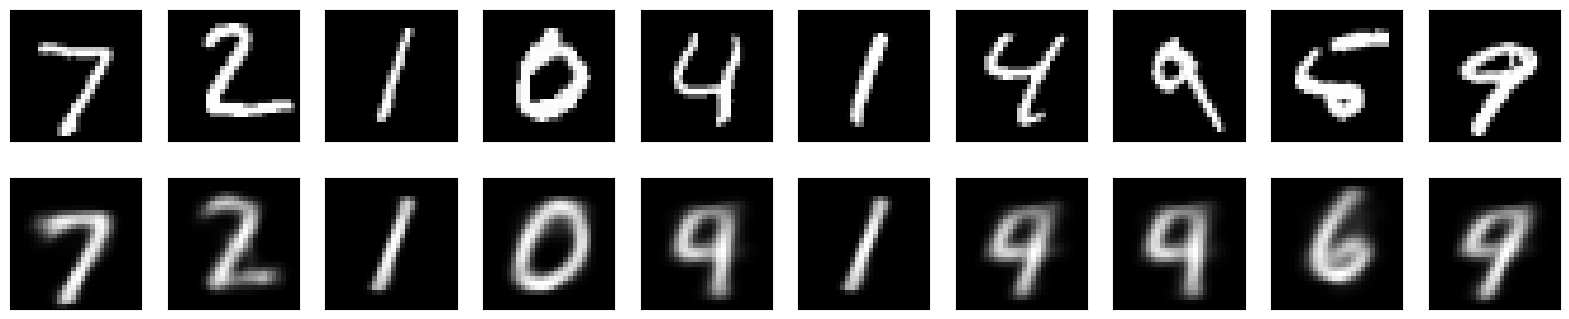

In [28]:
def plot_images(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Plot original and reconstructed images
print("Prediction of variational AutoEncoder")
plot_images(x_test, decoded_imgs)

In [29]:
def predict_ae(ae_model, x_test):
    return ae_model.predict(x_test)
decoded_imgs_auto_encoder = predict_ae(autoencoder, x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Prediction of AutoEncoder


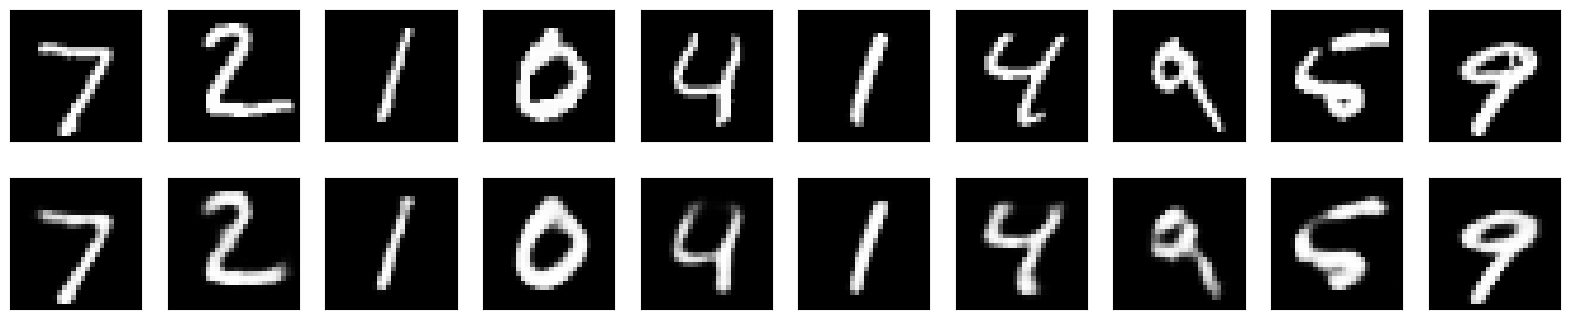

In [30]:
print("Prediction of AutoEncoder")
plot_images(x_test, decoded_imgs_auto_encoder)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Variational AutoEncoder Reconstruction Error 🔥</div>
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


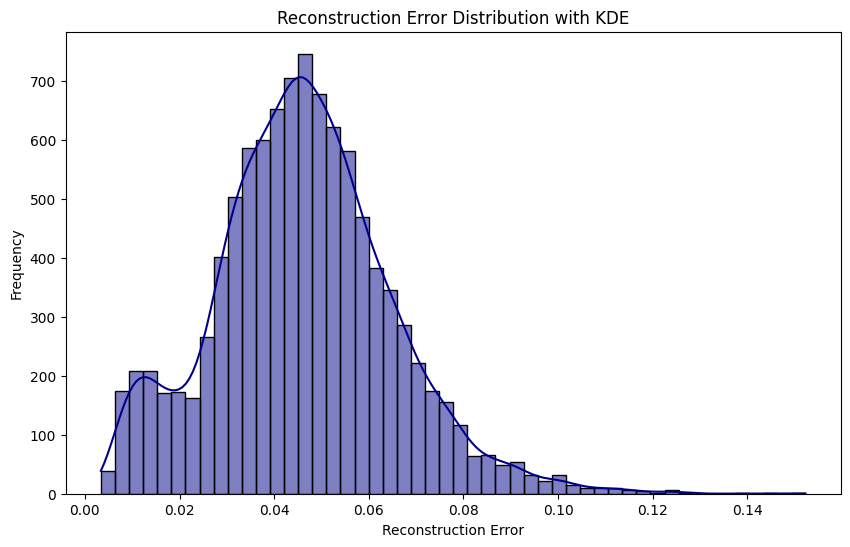

In [31]:
# Calculate reconstruction errors for the test set
reconstruction_errors = np.mean(np.square(x_test - decoded_imgs), axis=1)

# Plot the distribution of reconstruction errors
def plot_reconstruction_error_distribution(errors):
    plt.figure(figsize=(10, 6))
    #sns.histplot(errors, bins=50, kde=True, color='darkblue', edgecolor='black')
    sns.histplot(errors, bins=50, kde=True, color='darkblue', edgecolor='black')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Frequency')
    plt.title('Reconstruction Error Distribution with KDE')
    plt.show()

# Assuming you already have reconstruction_errors calculated
plot_reconstruction_error_distribution(reconstruction_errors)